# Importance of Data Visualization

Commonly employed techniques to underscore the significance of graphical representations in data exploration involve datasets that share numerous statistical properties yet yield distinct graphs.

In this notebook, we will showcase three widely recognized and exemplary examples:

- Anscombe’s Quartet
- Datasaurus
- Datasaurus Dozen

These examples emphasize the importance of not depending solely on summary statistics and highlight the critical role of data visualization tools in accurate data analysis.

## Dependencies

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import time

from matplotlib import pyplot as plt
# Use seaborn style
plt.style.use('seaborn-v0_8-darkgrid')

# To clear the output of the current cell and to embed a local file in the notebook
from IPython.display import clear_output, Image

# Inteeractive controls (widgets)
from ipywidgets import interact
# Displaying GIFs
import ipywidgets as widgets

# Read and write image data
import imageio.v3 as iio

# To perform a linear least-squares regression for two sets of measurements
from scipy.stats import linregress

pd.set_option('display.max_columns', 30)


## Folders and paths

In [2]:
# Paths for animation folder and frames (images)
animate_dir = "./images/animate" 
image_path = f"{animate_dir}/*.png"

# Create the folder recursively
os.makedirs(animate_dir, exist_ok=True)

# Anscombe’s Quartet

## Dataset

The Anscombe's Quartet, comprising four unique datasets, was formulated by the statistician Francis Anscombe in 1973. His objective was to challenge the prevailing belief among statisticians that 
>"*numerical calculations are exact, but graphs are rough*"

as he expressed in his writings.

These datasets underscore the significance of visualizing data during analysis and illustrate the impact of outliers and other influential observations on statistical properties.

The dataset I referenced can be found on [this Wikipedia page](https://en.wikipedia.org/wiki/Anscombe%27s_quartet#Data):

<img src="images/Anscombe's quartet data.png" alt="Anscombe's quartet data" style="width: 300px;"/>

I replicated the information from this page and stored it as a .tsv (tab-separated values) file.

I also updated the names of datasets in the first row.


Before we load the file, let's open it with Notepad and check first several rows:

<img src="images/Anscombe's quartet - Notepad.png" style="width: 450px;"/>



To generate a dataframe, we'll utilize the first two rows as 2-level column indices. 

Now, let's proceed to construct our dataframe.

In [3]:
# Creating dataframe with 2-level column indices
dfaq = pd.read_csv("data/Anscombe'sQuartet-wide.tsv", sep='\t', header=[0,1])
dfaq

AQ-I        AQ-II       AQ-III        AQ-IV       
      x      y     x     y      x      y     x      y
0    10   8.04    10  9.14     10   7.46     8   6.58
1     8   6.95     8  8.14      8   6.77     8   5.76
2    13   7.58    13  8.74     13  12.74     8   7.71
3     9   8.81     9  8.77      9   7.11     8   8.84
4    11   8.33    11  9.26     11   7.81     8   8.47
5    14   9.96    14  8.10     14   8.84     8   7.04
6     6   7.24     6  6.13      6   6.08     8   5.25
7     4   4.26     4  3.10      4   5.39    19  12.50
8    12  10.84    12  9.13     12   8.15     8   5.56
9     7   4.82     7  7.26      7   6.42     8   7.91
10    5   5.68     5  4.74      5   5.73     8   6.89

Let us first list indices for both levels:

In [4]:
list(dfaq.columns.levels)

[Index(['AQ-I', 'AQ-II', 'AQ-III', 'AQ-IV'], dtype='object'),
 Index(['x', 'y'], dtype='object')]

and then for the first level only.

In [5]:
list(dfaq.columns.levels[0])

['AQ-I', 'AQ-II', 'AQ-III', 'AQ-IV']

Because our dataset is composed of four smaller datasets, we will now break the above dataframe to four dataframes, one for each first level index.

In [6]:
# Loop per first level indices
for ind0 in list(dfaq.columns.levels[0]):
    print(ind0)
    display(dfaq[ind0].head(1))

AQ-I


,x,y
0,10,8.04


AQ-II


,x,y
0,10,9.14


AQ-III


,x,y
0,10,7.46


AQ-IV


,x,y
0,8,6.58


## Function to calculate and print summary statistics

Develop the function *`sum_stats()`* for computing summary statistics, intended for application across all datasets throughout the entire notebook.


In [7]:
# calculate and print summary statistics
def sum_stats(df):
    X = df.iloc[:, 0]
    Y = df.iloc[:, 1]
    
    return (
        f'X Mean: {X.mean():6.3f}\n'
        f'Y Mean: {Y.mean():6.3f}\n'
        f'X SD  : {X.std():6.3f}\n'
        f'Y SD  : {Y.std():6.3f}\n'
        f'Corr. : {X.corr(Y):6.3f}'
)

Let's test it for the *AQ-I* dataframe.

In [8]:
print(sum_stats(dfaq['AQ-I']))

X Mean:  9.000
Y Mean:  7.501
X SD  :  3.317
Y SD  :  2.032
Corr. :  0.816


## Plot Anscombe's Quartet

### Summary Statistics for Anscombe's Quartet

Prior to generating scatter plots, let's initially compare the summary statistics for all datasets. 

We will employ *matplotlib* and the *`sum_stats()`* function to showcase the summary statistics for each dataset.

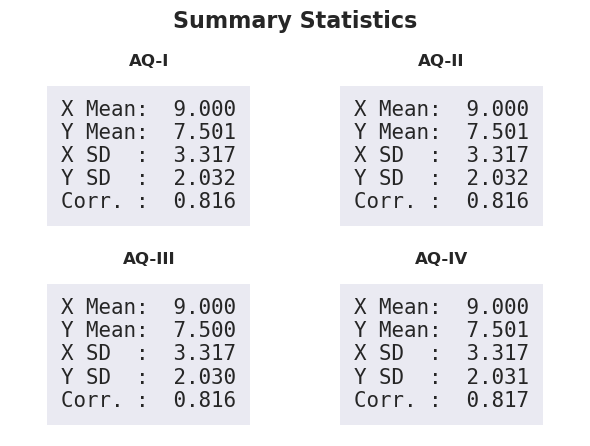

In [9]:
# Display summary statistics

# Define number of rows and columns
rows, cols = 2, 2

fig, axs = plt.subplots(rows, cols, figsize=(6, 4.5), tight_layout=True)
# Use Axes as 1D array
axs = axs.flat

fig.suptitle("Summary Statistics", fontsize=16, fontweight='bold')

# List of dataframe names (1st level indices for columns)
aqs = list(dfaq.columns.levels[0])
# Loop through each dataframe
for i in range(len(aqs)):
    df = dfaq[aqs[i]].copy()
    ax=axs[i]
    # Print text in each subplot
    ax.text(0.5, 0.5, sum_stats(dfaq[aqs[i]]), va='center', ha='center', family='monospace', fontsize=15, bbox={'facecolor':'#eaeaf2', 'pad': 10, 'edgecolor':'none'})

    ax.axis('off')
    ax.set_title(aqs[i], size=12, fontweight='bold')

# Save as .png file   
## plt.savefig("images/Anscombes' Quartet - Stats.png")

plt.show()

Upon reviewing basic summary statistics, it's apparent that all four datasets are identical. Each dataset shares identical summary statistics (X/Y mean, X/Y standard deviation, and Pearson’s correlation) up to the second decimal point.

Hence, following standard convention, we would anticipate significant similarities among these datasets. Let's delve into their behavior through graphical representation.

### Scatter Plots with Linear Regression Line

In addition to generating scatter plots for each dataset, we will incorporate a linear regression line and display its corresponding equation.


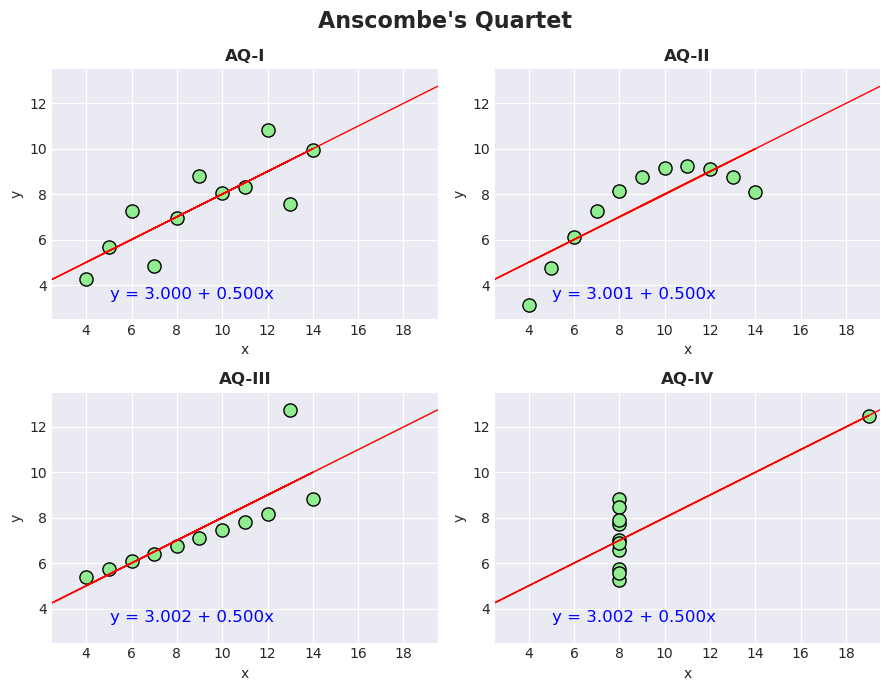

In [10]:
# Define number of rows and columns
rows, cols = 2, 2

# Create figure
fig, axs = plt.subplots(rows, cols, figsize=(9, 7), tight_layout=True)
# Use Axes as 1D array
axs = axs.flat
# Define the limits for the axis ranges 
xmin, xmax = 2.5, 19.5
ymin, ymax = 2.5, 13.5

fig.suptitle("Anscombe's Quartet", fontsize=16, fontweight='bold')

# List of dataframe names (1st level indices for columns)
aqs = list(dfaq.columns.levels[0])
# Loop through each dataframe
for i in range(len(aqs)):
    df = dfaq[aqs[i]].copy()
    ax=axs[i]
    
    # Scatter plot
    df.plot(kind = "scatter", 
                   x = "x",
                   y = "y",
                   s = 90,
                   color = 'lightgreen',
                   edgecolor = 'black',
                   ax=ax
                   )
    
    # Perform a linear regression
    X, y = df['x'], df['y']     
    slope, intercept, r_value, p_value, std_err = linregress(X, y)
    
    # Extended X to plot extended regression line through the plot
    X_ext = pd.concat([X, pd.Series([xmin, xmax])], ignore_index=True)
    regression = slope * X_ext + intercept
    # Add linear regression line to plot
    ax.plot(X_ext, regression, '-', c='r', linewidth=1.0)

    # Create linear regression equation
    lreg_eq = f'y = {intercept:.3f} + {slope:.3f}x'
    # Add linear regression equation to plot
    xy_point = (0.15, 0.1)
    ax.annotate(lreg_eq, xy_point ,fontsize=12, color='b', xycoords='axes fraction', va='center')

    # Set title and ranges for x and y axis
    ax.set_title(aqs[i], size=12, fontweight='bold')    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# Save as .png file   
## plt.savefig("images/Anscombes' Quartet.png")

plt.show()

Besides sharing identical summary statistics, the datasets are constructed to yield approximately the same linear regression line, with accuracy for intercept and slope up to 2 and 3 decimal places, respectively.

However, upon visualizing the data, the graphs for all four datasets exhibit clear and distinctive differences.


In summary:

- **AQ-I**: Appears to depict a simple linear relationship with a strong upward linear trend, indicative of two correlated variables.

- **AQ-II**: Narrates a completely different story when plotted; while a relationship between the two variables is evident, it is notably not linear.

- **AQ-III**: Presents a perfect linear relationship, except for one outlier that significantly influences the results, lowering the correlation coefficient from 1 to 0.816.

- **AQ-IV**: Demonstrates an instance where a single high-leverage point is sufficient to generate a high correlation coefficient, even though the other data points do not suggest any relationship between the variables.

This example underscores that descriptive statistics and numerical information alone may not provide a comprehensive understanding of the data, emphasizing the importance of visual analysis.

# Datasaurus

Data visualization expert Alberto Cairo crafted the Datasaurus dataset in 2016.
 
In a tweet, he advocates for the idea that one should
 
>"*never trust summary statistics alone; always visualize your data.*"

This dataset comprises data points with seemingly ordinary statistics. Yet, when plotted, these points unveil the distinct shape of a dinosaur.
 

## Dataset

The dataset can be downloaded from [this link](http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html).  

Let's load the downloaded .csv file, capitalize the column names, and create dataframe. 

In [11]:
dfd = pd.read_csv('data/Datasaurus_data.csv', header=None, names=(['X', 'Y']) )
dfd.head(2)

,X,Y
0,55.3846,97.1795
1,51.5385,96.0256


## Summary Statistics

Let's first run our *`sum_stats()`* function.

In [12]:
print(f'\n    Dino \nSummary Statistics\n')
print(sum_stats(dfd), '\n')


    Dino 
Summary Statistics

X Mean: 54.263
Y Mean: 47.832
X SD  : 16.765
Y SD  : 26.935
Corr. : -0.064 



### Plotting Dino

Following the observation of apparently typical statistics, let's move forward with visualizing our data.

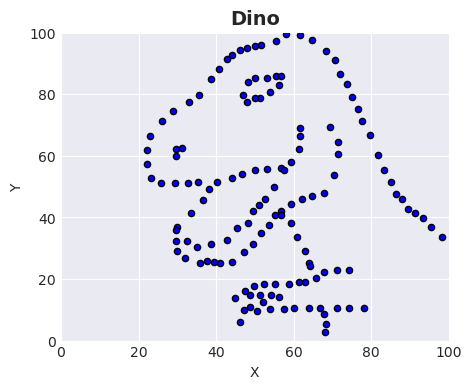

In [13]:
# Plotting Dino
fig, ax = plt.subplots(figsize=(5, 4))

# Define the limits for the axis ranges 
xmin, xmax = 0, 100
ymin, ymax = 0, 100

# Scatter plot
dfd.plot(kind = "scatter", 
               x = "X",
               y = "Y",
               s = 20,
               color = 'blue',
               edgecolor = 'black',
               ax=ax
        )

# Set title and ranges for x and y axis
ax.set_title('Dino', size=14, fontweight='bold')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Save as .png file   
## plt.savefig("images/Dino.png")

plt.show()

Indeed, our scatterplot unveiled the unmistakable shape of a dinosaur.

# Datasaurus Dozen

For several decades, Anscombe's quartet has stood as a widely recognized and effective method for emphasizing the importance of visualizing data. However, the origin of Anscombe's datasets remains unknown.

Justin Matejka and George Fitzmaurice introduced a versatile method for transforming any dataset into a target shape of choice while preserving specified summary statistics (up to two decimal places). Drawing inspiration from the Datasaurus dataset, they used it as the initial point to generate a set of diverse datasets, resulting in The Datasaurus Dozen.

The Datasaurus Dozen comprises 13 datasets, including the original Datasaurus dataset and 12 others.

## Dataset

We wiil use the wide version of data: *DatasaurusDozen-wide.tsv*.<br>
To create a dataframe, we'll employ the initial two rows as dual-level column indices. 

Next, let's proceed with the construction of our dataframe.

In [14]:
# Creating dataframe with 2-level column indices
dfdd = pd.read_csv("data/DatasaurusDozen-wide.tsv", sep='\t', header=[0,1])
dfdd.head()

away              bullseye                circle                dino   
           x          y          x          y          x          y        x   
0  32.331110  61.411101  51.203891  83.339777  55.993030  79.277264  55.3846  \
1  53.421463  26.186880  58.974470  85.499818  50.032254  79.013071  51.5385   
2  63.920202  30.832194  51.872073  85.829738  51.288459  82.435940  46.1538   
3  70.289506  82.533649  48.179931  85.045117  51.170537  79.165294  42.8205   
4  34.118830  45.734551  41.683200  84.017941  44.377915  78.164628  40.7692   

                 dots               h_lines            high_lines              
         y          x          y          x          y          x          y   
0  97.1795  51.147917  90.867412  53.366567  90.208030  57.613234  83.905171  \
1  96.0256  50.517126  89.102395  52.801979  90.088065  51.274392  82.817983   
2  94.4872  50.207480  85.460047  47.054130  90.458936  50.753898  76.754129   
3  91.4103  50.069482  83.057670  42.448434  89.507700  37.021184  81.954470   
4  88.3333  50.562846  82.937822  42.704036  90.442629  42.881755  80.184770   

  slant_down              slant_up                  star              
           x          y          x          y          x          y   
0  52.872021  97.343223  47.695201  95.241187  58.213608  91.881892  \
1  59.014144  93.574875  44.609976  93.075835  58.196054  92.214989   
2  56.375109  96.305148  43.856381  94.085872  58.718231  90.310532   
3  37.839200  94.359444  41.578929  90.303567  57.278373  89.907607   
4  39.885373  90.634662  49.177419  96.610532  58.082020  92.008145   

     v_lines            wide_lines               x_shape             
           x          y          x          y          x          y  
0  50.481508  93.222701  65.815540  95.588374  38.337757  92.472719  
1  50.282406  97.609984  65.672265  91.933402  35.751871  94.116768  
2  50.186703  99.694680  39.002716  92.261838  32.767218  88.518295  
3  50.326911  90.022053  37.795303  93.532455  33.729607  88.622266  
4  50.456207  89.987410  35.513901  89.599190  37.238249  83.724928

List column indices for both levels

In [15]:
list(dfdd.columns.levels)

[Index(['away', 'bullseye', 'circle', 'dino', 'dots', 'h_lines', 'high_lines',
        'slant_down', 'slant_up', 'star', 'v_lines', 'wide_lines', 'x_shape'],
       dtype='object'),
 Index(['x', 'y'], dtype='object')]

Create new indices by using Python string method *`title()`* to convert strings to title case.

In [16]:
# Index level 0
ind0 = [t.title() for t in list(dfdd.columns.levels)[0]]
print(ind0)

['Away', 'Bullseye', 'Circle', 'Dino', 'Dots', 'H_Lines', 'High_Lines', 'Slant_Down', 'Slant_Up', 'Star', 'V_Lines', 'Wide_Lines', 'X_Shape']


In [17]:
# Index level 1
ind1 = [t.title() for t in list(dfdd.columns.levels)[1]]
print(ind1)

['X', 'Y']


Set new index levels using indices converted to title case.

In [18]:
dfdd.columns = dfdd.columns.set_levels([ind0, ind1], level=[0, 1])

In [19]:
dfdd.columns

MultiIndex([(      'Away', 'X'),
            (      'Away', 'Y'),
            (  'Bullseye', 'X'),
            (  'Bullseye', 'Y'),
            (    'Circle', 'X'),
            (    'Circle', 'Y'),
            (      'Dino', 'X'),
            (      'Dino', 'Y'),
            (      'Dots', 'X'),
            (      'Dots', 'Y'),
            (   'H_Lines', 'X'),
            (   'H_Lines', 'Y'),
            ('High_Lines', 'X'),
            ('High_Lines', 'Y'),
            ('Slant_Down', 'X'),
            ('Slant_Down', 'Y'),
            (  'Slant_Up', 'X'),
            (  'Slant_Up', 'Y'),
            (      'Star', 'X'),
            (      'Star', 'Y'),
            (   'V_Lines', 'X'),
            (   'V_Lines', 'Y'),
            ('Wide_Lines', 'X'),
            ('Wide_Lines', 'Y'),
            (   'X_Shape', 'X'),
            (   'X_Shape', 'Y')],
           )

Display the dataframe to see if everything is OK.

In [20]:
dfdd.head()

Away              Bullseye                Circle                Dino   
           X          Y          X          Y          X          Y        X   
0  32.331110  61.411101  51.203891  83.339777  55.993030  79.277264  55.3846  \
1  53.421463  26.186880  58.974470  85.499818  50.032254  79.013071  51.5385   
2  63.920202  30.832194  51.872073  85.829738  51.288459  82.435940  46.1538   
3  70.289506  82.533649  48.179931  85.045117  51.170537  79.165294  42.8205   
4  34.118830  45.734551  41.683200  84.017941  44.377915  78.164628  40.7692   

                 Dots               H_Lines            High_Lines              
         Y          X          Y          X          Y          X          Y   
0  97.1795  51.147917  90.867412  53.366567  90.208030  57.613234  83.905171  \
1  96.0256  50.517126  89.102395  52.801979  90.088065  51.274392  82.817983   
2  94.4872  50.207480  85.460047  47.054130  90.458936  50.753898  76.754129   
3  91.4103  50.069482  83.057670  42.448434  89.507700  37.021184  81.954470   
4  88.3333  50.562846  82.937822  42.704036  90.442629  42.881755  80.184770   

  Slant_Down              Slant_Up                  Star              
           X          Y          X          Y          X          Y   
0  52.872021  97.343223  47.695201  95.241187  58.213608  91.881892  \
1  59.014144  93.574875  44.609976  93.075835  58.196054  92.214989   
2  56.375109  96.305148  43.856381  94.085872  58.718231  90.310532   
3  37.839200  94.359444  41.578929  90.303567  57.278373  89.907607   
4  39.885373  90.634662  49.177419  96.610532  58.082020  92.008145   

     V_Lines            Wide_Lines               X_Shape             
           X          Y          X          Y          X          Y  
0  50.481508  93.222701  65.815540  95.588374  38.337757  92.472719  
1  50.282406  97.609984  65.672265  91.933402  35.751871  94.116768  
2  50.186703  99.694680  39.002716  92.261838  32.767218  88.518295  
3  50.326911  90.022053  37.795303  93.532455  33.729607  88.622266  
4  50.456207  89.987410  35.513901  89.599190  37.238249  83.724928

Count the number of datasets in our dataframe.

In [21]:
len(dfdd.columns.levels[0])

13

Observing the presence of 13 datasets, including the Datasaurus (*Dino*) and 12 others, we aim to generate two variations of plots.  
One will be arranged in a 5 x 3 grid, while the other will adopt a 4 x 4 grid layout.  
Additionally, alongside the 13 datasets, we intend to plot the statistics and title in the remaining Axes.  

The choice of grid will depend on the format of our embedding target.

## 5 x 3 Grid

The first row is reserved for the title, *Dino* dataset, and the statistics. The rest of the datasets will fill remaining Axes.

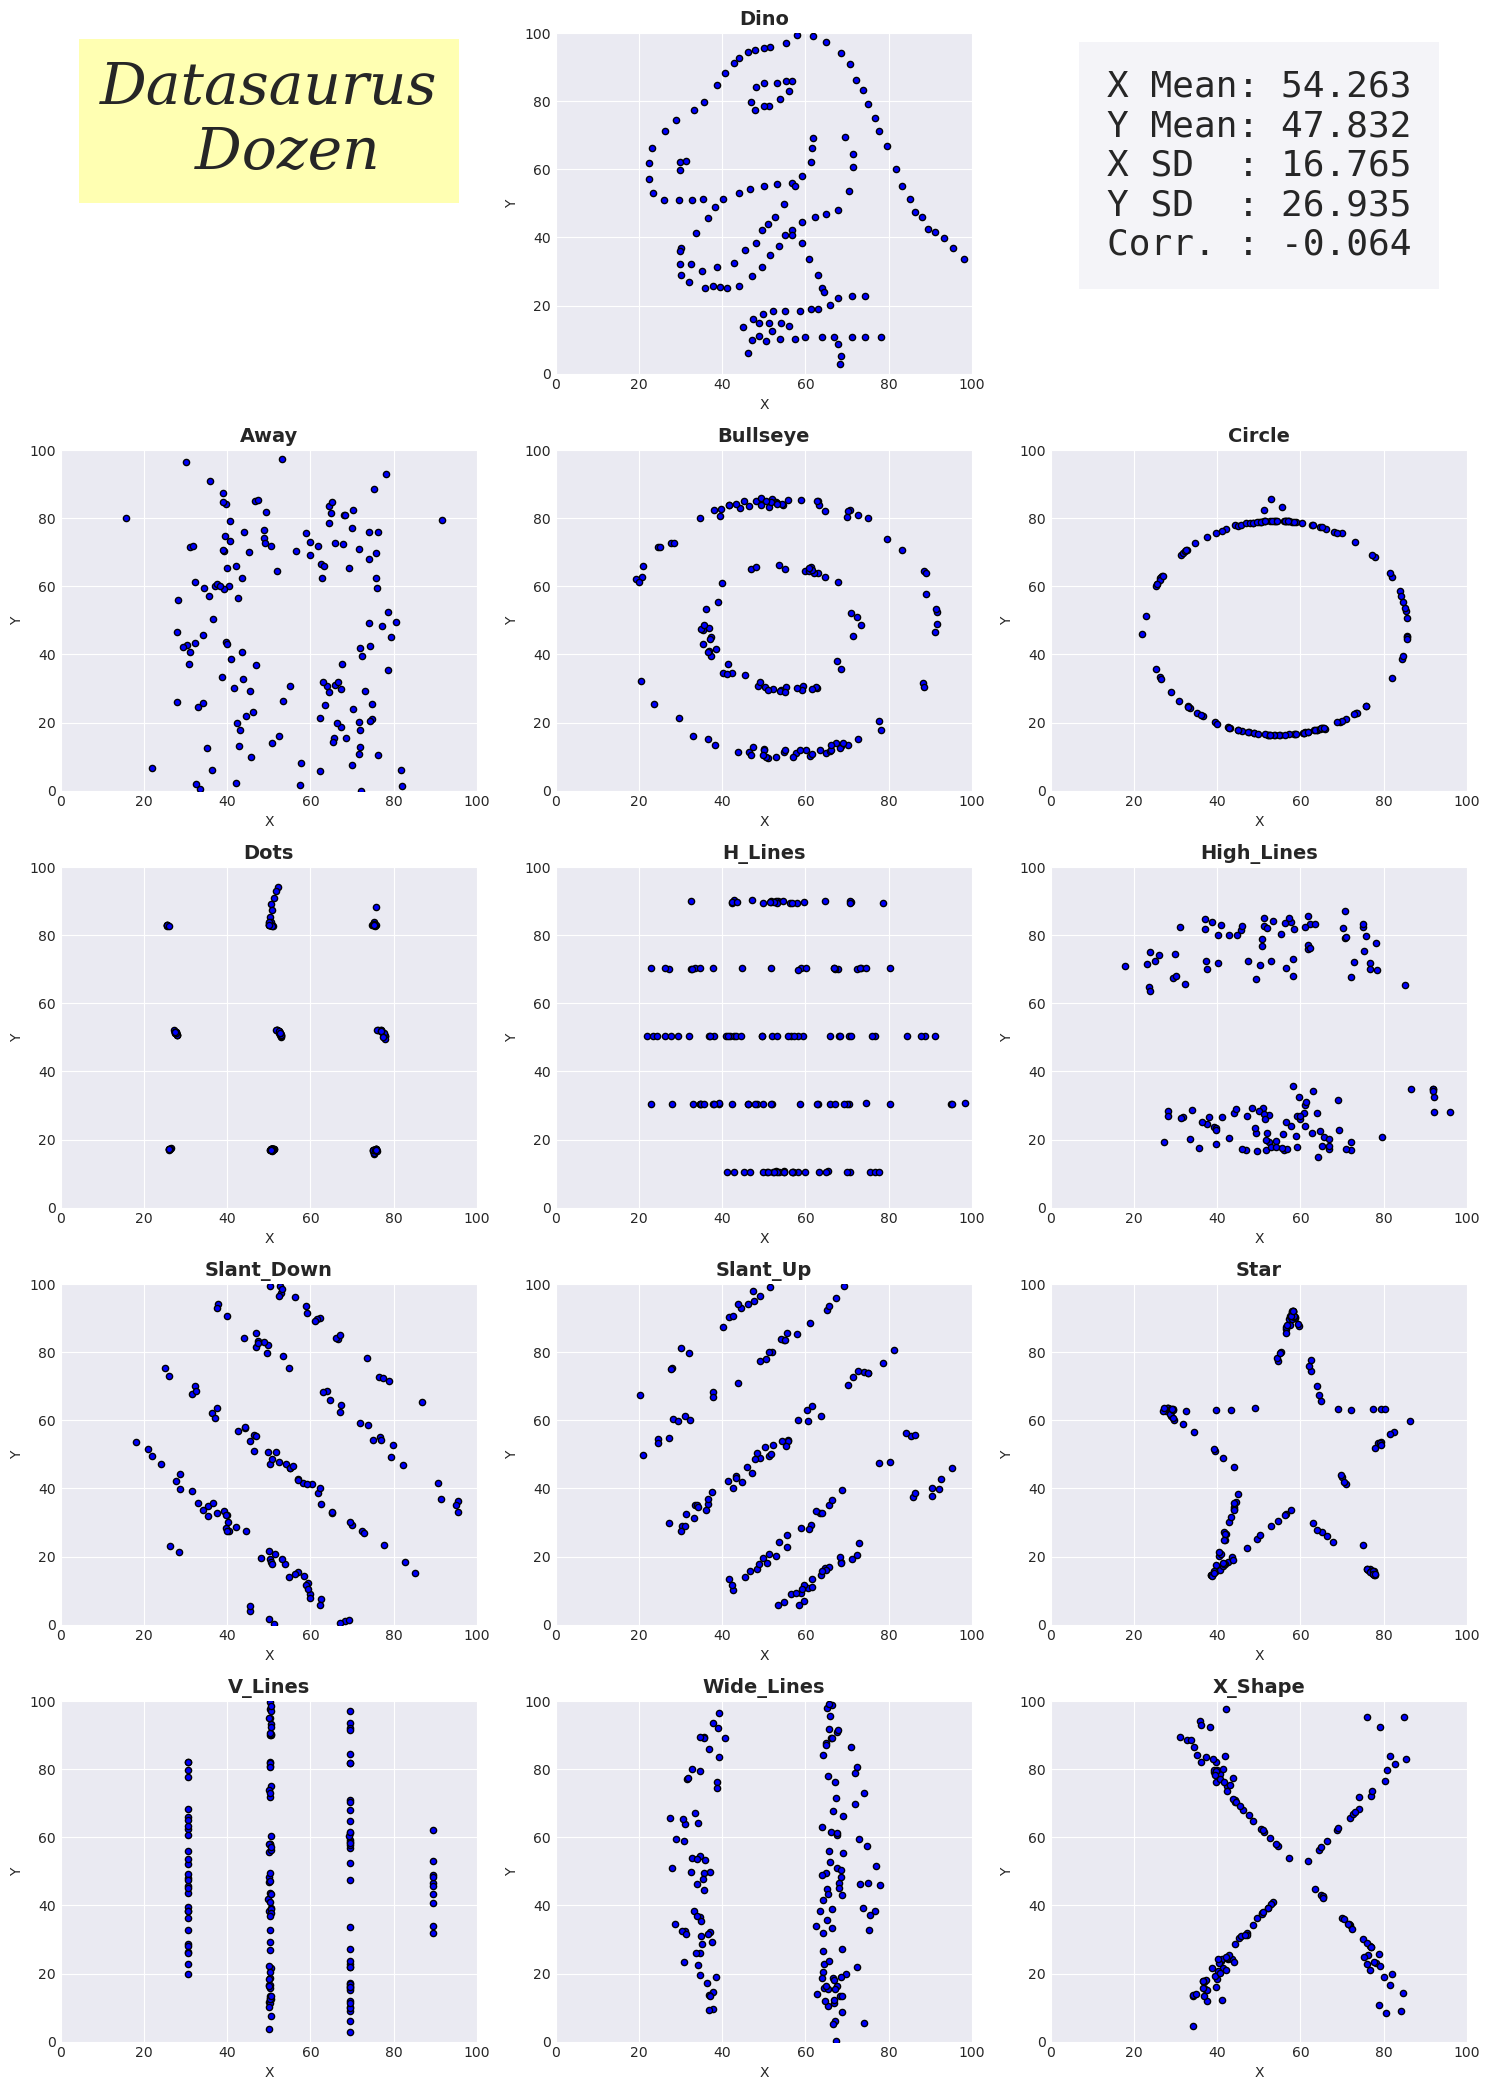

In [22]:
# Define number of rows and columns
rows, cols = 5, 3

# Create figure
fig, axs = plt.subplots(rows, cols, figsize=(15, 21), tight_layout=True)
# Use Axes as 1D array
axs = axs.flat
# Define the limits for the axis ranges 
xmin, xmax = 0, 100
ymin, ymax = 0, 100

# Write the title of our plot in first Axes
ax=axs[0]
ax.text(0.5, 0.6, 'Datasaurus\n  Dozen' , ha='center', family='serif', fontweight=545, fontstyle='oblique', fontsize=42, bbox={'facecolor': 'yellow', 'alpha': 0.3, 'pad': 15, 'edgecolor':'none'})
ax.axis('off')

# Plot Dino
dino = dfdd.Dino
ax = axs[1]
dino.plot(kind = "scatter", 
           x = "X",
           y = "Y",
           s = 20,
           color = 'blue',
           edgecolor = 'black',
           ax=ax
        )
ax.set_title('Dino', size=14, fontweight='bold')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Write Dino summary statistics
ax=axs[2]
ax.text(0.5, 0.35, sum_stats(dino) , ha='center', family='monospace', fontsize=26, bbox={'facecolor':'#eaeaf2', 'alpha': 0.5, 'pad': 20, 'edgecolor':'none'})
ax.axis('off')

## Plot the rest of datasets 

df12 = dfdd.drop('Dino', axis=1)
# After dropping Dino dataframe, remove this unused level
df12.columns =df12.columns.remove_unused_levels()

# List the rest of dataframe names (1st level indices for columns)
dds = list(df12.columns.levels[0])
# Loop through each dataframe
for i in range(len(dds)):
    df = df12[dds[i]] 
    ax=axs[i + 3]
    
    # Scatter plot
    df.plot(kind = "scatter", 
                   x = "X",
                   y = "Y",
                   s = 20,
                   color = 'blue',
                   edgecolor = 'black',
                   ax=ax
                   )

    # Set title and ranges for x and y axis    
    ax.set_title(dds[i], size=14, fontweight='bold')    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# Save as .png file   
## plt.savefig("images/Datasaurus Dozen - full_5x3.png")

plt.show()

## 4 x 4 Grid

For this grid, we will have one additional Axes in the first row, and we would like to avoid having completely empty Axes.  
Therefore, in addition to the title, the *Dino* dataset, and the statistics, we will plot my logo.  
The remaining Axes will be filled with the rest of the datasets.


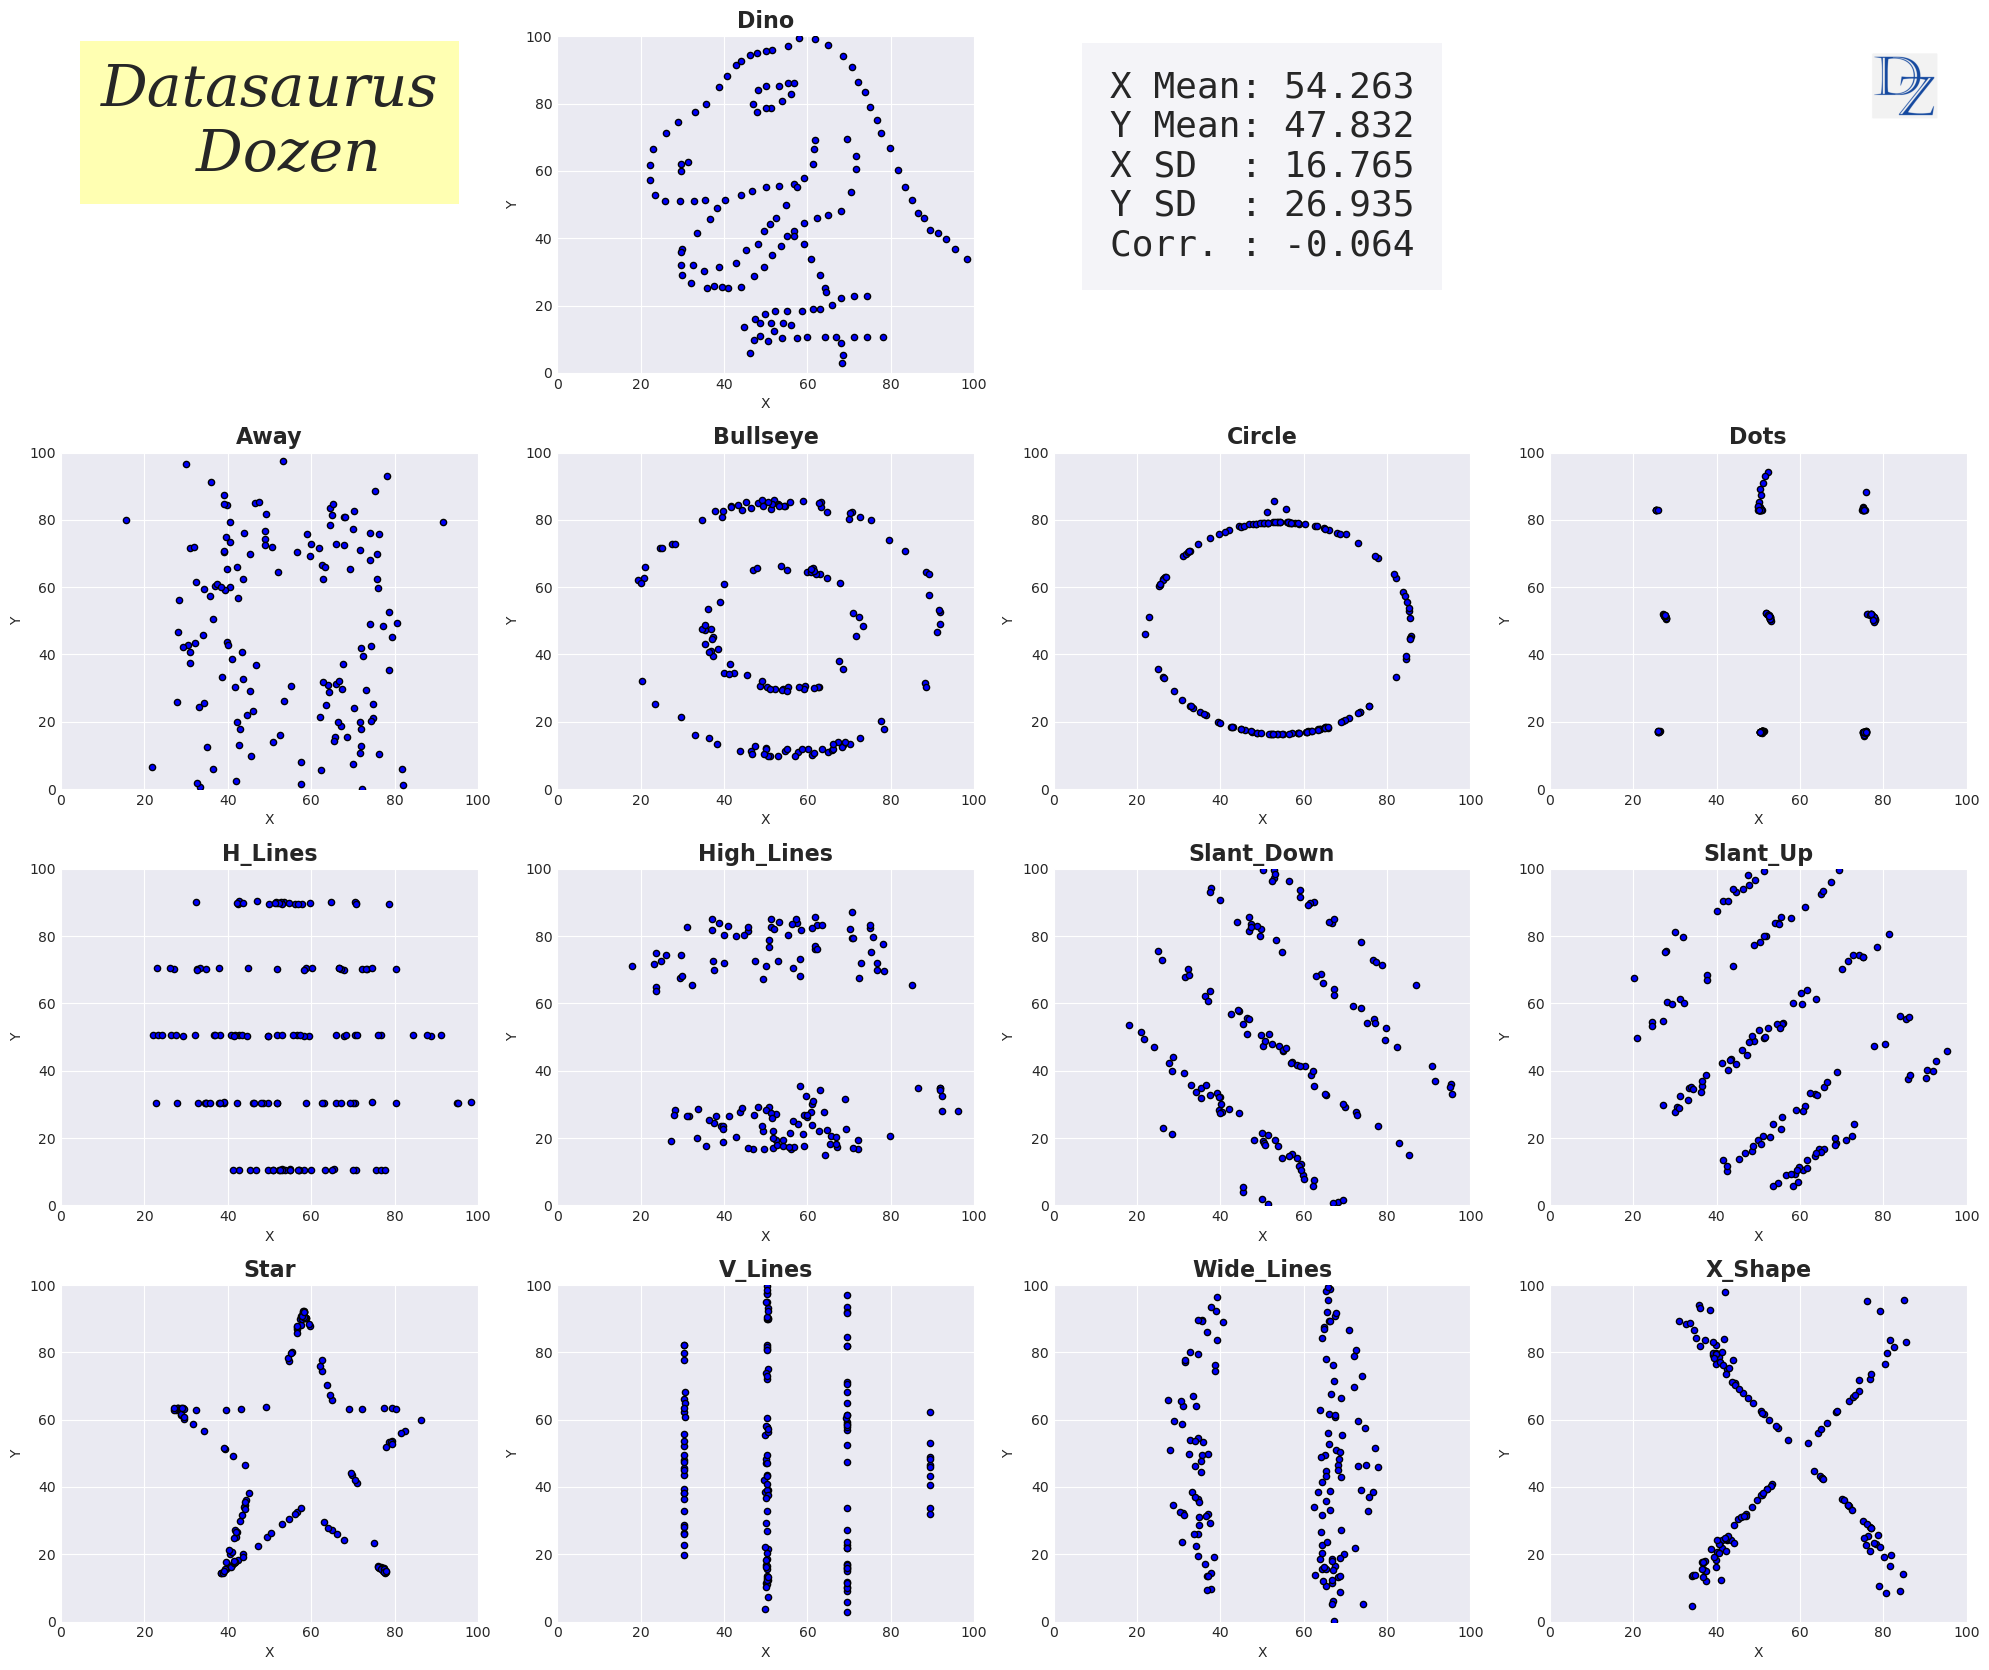

In [23]:
# Define number of rows and columns
rows, cols = 4, 4

# Create figure
fig, axs = plt.subplots(rows, cols, figsize=(20, 16.8), tight_layout=True)
# Use Axes as 1D array
axs = axs.flat
# Define the limits for the axis ranges
xmin, xmax = 0, 100
ymin, ymax = 0, 100

# Write the title of our plot in the first Axes
ax=axs[0]
ax.text(0.5, 0.6, 'Datasaurus\n  Dozen' , ha='center', family='serif', fontweight=545, fontstyle='oblique', fontsize=42, bbox={'facecolor': 'yellow', 'alpha': 0.3, 'pad': 15, 'edgecolor':'none'})
ax.axis('off')

# Plot Dino
dino = dfdd.Dino
ax = axs[1]
dino.plot(kind = "scatter", 
           x = "X",
           y = "Y",
           s = 20,
           color = 'blue',
           edgecolor = 'black',
           ax=ax
        )
ax.set_title('Dino', size=16, fontweight='bold')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Write Dino summary statistics
ax=axs[2]
ax.text(0.5, 0.35, sum_stats(dino) , ha='center', family='monospace', fontsize=26, bbox={'facecolor':'#eaeaf2', 'alpha': 0.5, 'pad': 20, 'edgecolor':'none'})
ax.axis('off')

# Plot the logo
ax=axs[3]
icon = plt.imread('images/favicon_2_bg1_blue.png')
axin= ax.inset_axes([0.75, 0.75, 0.2, 0.2])
axin.imshow(icon)
axin.axis('off')
ax.axis('off')

## Plot the rest of datasets 

df12 = dfdd.drop('Dino', axis=1)
# After dropping Dino dataframe, remove this unused layer
df12.columns =df12.columns.remove_unused_levels()

# List the rest of dataframe names (1st level indices for columns)
dds = list(df12.columns.levels[0])
# Loop through each dataframe
for i in range(len(dds)):
    df = df12[dds[i]] 
    ax=axs[i + 4]
    
    # Scatter plot
    df.plot(kind = "scatter", 
                   x = "X",
                   y = "Y",
                   s = 20,
                   color = 'blue',
                   edgecolor = 'black',
                   ax=ax
                   )
    # Set title and ranges for x and y axis
    ax.set_title(dds[i], size=16, fontweight='bold')    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# Save the plot as .png file   
## plt.savefig("images/Datasaurus Dozen - full_4x4.png")

plt.show()

## Exploring Datasaurus Dozen with Interactive Controls

### Overview

Rather than plotting all datasets in a single figure, we prefer to plot each dataset with its own statistics in a separate figure. However, we aim to avoid creating a total of 13 cells to plot all datasets.

To achieve these objectives, we will use interactive IPython widgets, imported with the following statement:

```python
from ipywidgets import interact```

This library enables us to transform Jupyter Notebooks from static documents into interactive dashboards, ideal for exploring and visualizing data. Its interactive widgets are particularly useful for selecting data to plot without the need to rewrite or rerun code.

### Our Application

Using the `@interact` decorator, the IPywidgets library examines the function's inputs and generates interactive controls based on their types.  
In our case, it will generate a dropdown menu for selecting our datasets. The dropdown menu is created by passing a list of strings, which in our case are the names of our Datasaurus Dozen datasets. These strings serve as both the names displayed in the dropdown menu UI and the values passed to the underlying Python function.

Here is the list of our dataframe names we used earlier:

In [24]:
ddlist = list(dfdd.columns.levels[0])
print(ddlist)

['Away', 'Bullseye', 'Circle', 'Dino', 'Dots', 'H_Lines', 'High_Lines', 'Slant_Down', 'Slant_Up', 'Star', 'V_Lines', 'Wide_Lines', 'X_Shape']


We want the initial dataset to be 'Dino'.  
Therefore, we will move 'Dino' to the beginning of the list.  
To do this, we will create a function called *`Dino_to_0()`*.

In [25]:
# Function to move 'Dino' to front of list
def Dino_to_0(df):
    dflist = list(df.columns.levels[0])
    dflist.remove('Dino')
    dflist.insert(0, 'Dino')
    return dflist

Run the *`Dino_to_0()`* function.

In [26]:
ddlist = Dino_to_0(dfdd)
print(ddlist)

['Dino', 'Away', 'Bullseye', 'Circle', 'Dots', 'H_Lines', 'High_Lines', 'Slant_Down', 'Slant_Up', 'Star', 'V_Lines', 'Wide_Lines', 'X_Shape']


Now that we have the updated list of dataframe names, we can pass it to the underlying function to create a dropdown menu of our dataframe names.  
Since we moved *Dino* to the start of the list, *Dino* will be plotted first after we run the cell. Subsequently, we can choose from the dropdown menu any one of the 13 datasets to be plotted without needing to rewrite or rerun code.

To add padding between our plot and neighboring cells, we will use several print commands.

In [27]:
print('\n')
@interact
def plot_ds12(Dataset = ddlist):

    # Dataframe for the chosen Dataset
    df = dfdd[Dataset]

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4), tight_layout=True )
    fig.suptitle(Dataset, fontsize=16, fontweight='bold')
    # Use Axes as 1D array
    axs = axs.flat
    # Define the limits for the axis ranges 
    xmin, xmax = 0, 100
    ymin, ymax = 0, 100
    
    # Scatter plot
    df.plot(kind = "scatter", 
                   x = "X",
                   y = "Y",
                   s = 20,
                   color = 'blue',
                   edgecolor = 'black',
                   ax=axs[0]
                   )

    # Write summary statistics
    axs[1].text(0.5, 0.5, sum_stats(df) , va='center', ha='center', family='monospace', fontsize=20, bbox={'facecolor': '#eaeaf2', 'pad': 25, 'edgecolor':'none'})
    axs[1].axis('off')

    # Set ranges for x and y axis
    axs[0].set_xlim(xmin, xmax)
    axs[0].set_ylim(ymin, ymax)

    # Save as .png file   
    ## plt.savefig(f"images/Datasaurus Dozen - interactive_{Dataset}.png")
    print()
    
    plt.show()
    print()

interactive(children=(Dropdown(description='Dataset', options=('Dino', 'Away', 'Bullseye', 'Circle', 'Dots', '…

## Datasaurus Dozen Animation

Previously, we enjoyed using interactive controls to display our images, including scatter plots and summary statistics, for chosen datasets. That was pretty cool, but to go through all 13 datasets, we needed to choose each dataset from the dropdown menu.

Can we somehow automate this process? Yes, we could use image animation. We could display one image for some time and then replace it with another one in the same figure. Doing this in a loop through all datasets will give us the illusion of plot animation.

For this animation, we will use the *`clear_output()`* and *`display()`* functions from the **IPython display** module. Since IPython 5.4 and 6.1, *`display()`* is automatically made available without import, and *`clear_output()`* we imported with this statement:

```Python
from IPython.display import clear_output
```

To animate, we will create the *`dd_animate()`* function to follow these steps looping through all datasets:

1. Create the plot as we did previously.
2. Save the plot as a PNG file. It will be used later to create "animated images" as a GIF (Graphics Interchange Format) file:
   ```python
   plt.savefig()
   ```
3. Display the figure:
   ```python
   display(fig)
   ```
4. Keep displaying the plot for the set time:
   ```python
   time.sleep(interval)
   ```
5. Clear both Axes:
   ```python
   axs[0].cla(); axs[1].cla()
   ```
6. Clear the output of the current cell:
   ```python
   clear_output(wait=True)
   ```

#### Creating *`dd_animate()`* function

In [28]:
def dd_animate(dfin, interval=2, saving=False):
    """ Animate plots of Datasaurus Dozen datasets together with their statistics
    
    Args:
        dfin: input dataframe with 2 level column indices
        interval: Duration [seconds] for which each plot should be displayed, default is 2
        saving: True if we are storing plots, default is False
        
    Returns:
        Displays every plot for "interval" seconds (animation),
        and, if chosen, saves the plots in PNG format to be used later for GIF creation
    """
   
    # If there were no images in folder and "saving" was set to False, change "saving" to True
    #  we want to have images for GIF creation 
    if len(glob.glob(image_path)) == 0 and saving == False: 
        saving = True
    
    # Create the list of Datasaurus Dozen dataframes with Dino at the front
    ddlist = Dino_to_0(dfin)

    # Define the limits for the axis ranges 
    xmin, xmax = 0, 100
    ymin, ymax = 0, 100

    # Create figure
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4), tight_layout=True )
    # Use Axes as 1D array
    axs = axs.flat

    # Scatter plot for every DD dataframe
    for i, df_name in enumerate(ddlist): 
        fig.suptitle(df_name, fontsize=16, fontweight='bold')
    
        df = dfin[df_name]
        df.plot(kind = "scatter", 
                       x = "X",
                       y = "Y",
                       s = 20,
                       color = 'blue',
                       edgecolor = 'black',
                       ax=axs[0]
                       )
        # Write summary statistics
        axs[1].text(0.5, 0.5, sum_stats(df) , va='center', ha='center', family='monospace', fontsize=20, bbox={'facecolor': '#eaeaf2', 'pad': 25, 'edgecolor':'none'})
        axs[1].axis('off')
    
        # Set ranges for x and y axis
        axs[0].set_xlim(xmin, xmax)
        axs[0].set_ylim(ymin, ymax)
        
        # Animation using display() function in "IPython display" module
        display(fig)
        # Saving images
        if saving:
            plt.savefig(f'{animate_dir}/img{i+1:02d}_{df_name}.png')
        # Display each image for "interval" seconds
        time.sleep(interval) 
        # Clear both Axes
        axs[0].cla()
        axs[1].cla()
        # Clear the output of the current cell 
        clear_output(wait=True)
    
    plt.close(fig)
    
    # Plot the end message
    plt.figure(figsize=(5.5, 1))
    plt.text(0.5, 0.5, "That's all Folks!", va='center', ha='center', family='serif', fontweight=550 , fontstyle='oblique', fontsize=30, bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 15, 'edgecolor':'none'})
    plt.axis('off');
    
    # Print list of saved images
    if saving:   
        print(f"\nAnimation images have been stored in {animate_dir}:")
    else:
        print(f"\nAnimation images already stored in {animate_dir}:")
    files = glob.glob(image_path)
    print([f"{os.path.basename(f)}" for f in files], '\n\n')


#### Run *`dd_animate()`* function

To execute the *`dd_animate()`* function, use the following statement:

```python
dd_animate(dfdd, interval=3, saving=True)
```

Where:
- `dfdd` is our dataframe containing the 13 Datasaurus Dozen datasets.
- `interval` is the duration in seconds for which each plot should be displayed.
- `saving` is set to True if we want to store our plots.

To run the function with the default values (interval=2, saving=False), use this statement:

```python
dd_animate(dfdd)
```


Animation images already stored in ./images/animate:
['img01_Dino.png', 'img02_Away.png', 'img03_Bullseye.png', 'img04_Circle.png', 'img05_Dots.png', 'img06_H_Lines.png', 'img07_High_Lines.png', 'img08_Slant_Down.png', 'img09_Slant_Up.png', 'img10_Star.png', 'img11_V_Lines.png', 'img12_Wide_Lines.png', 'img13_X_Shape.png'] 




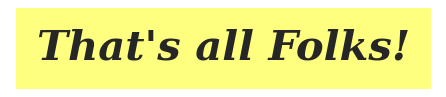

In [29]:
# Run dd_animate() function
## dd_animate(dfdd, interval=3, saving=True)
dd_animate(dfdd)

**NOTE:**  
&emsp;
To replay the animation, rerun the preceding cell.


## Creating GIF from PNG files

For creating GIF animations, we'll utilize the Python library **imageio**, which provides a simple interface for handling a variety of image formats. **imageio** is compatible with Python versions 3.5 and above.

We will use version 3 of the **imageio** library, which we imported with the following statement:
```python
import imageio.v3 as iio
```


In [30]:
# Read and write image data
files = glob.glob(image_path)
frames = [ ]
for file in files:   
   frames.append(iio.imread(file))

iio.imwrite(f'{animate_dir}/DatasaurusDozen_0.gif', # Name of new GIF
            frames, # List containing image data
            duration = 2000, # Duration [miliseconds] for which each image should be displayed in GIF
            loop = 0 # Repeat time of the GIF, 0 - keeps looping forever
           )

By adjusting the `loop` argument, we generated two versions of the GIF:

- `loop=0` - a GIF that loops indefinitely: *DatasaurusDozen_0.gif*
- `loop=2` - a GIF that repeats twice: *DatasaurusDozen_2.gif*


## Displaying GIF in the Notebook

We will offer three methods for displaying GIF files within the Jupyter Notebook:
- IPython.display.Image class
- HTML tag in markdown
- Jupyter Widgets (ipywidgets)

**NOTE:**  
&emsp;The first two methods do not support restarting the GIF if we are not keeping it looping forever.  
&emsp;The GIF will halt at the last frame, and we will be unable to rerun it simply by restarting the cell.  
&emsp;To restart it, we will first need to modify something in the cell and then restart the cell.


### IPython.display.Image

For this method we will utilize the `Image` class from the `IPython.display` module.

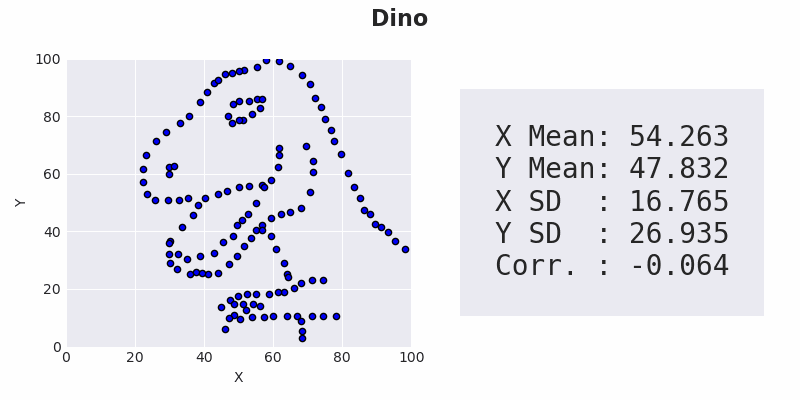

In [31]:
Image(filename=f'{animate_dir}/DatasaurusDozen_2.gif',
              format='gif', 
              width=600
)

### HTML tag in a Mardown cell

Instead of the Markdown standard syntax, we will employ the HTML `<img>` tag to insert the GIF file.  
Using the HTML tag offers the advantage of being able to control size and other style elements.

**GIF location:** *'./images/animate/DatasaurusDozen_2.gif'*
 
<img src='./images/animate/DatasaurusDozen_2.gif' alt="Datasaurus Dozen" width="600" />   


### Jupyter Widgets (ipywidgets)

For GIFs without a forever loop, employing widgets enables us to rerun the GIF simply by restarting the cell.  
The two previous methods do not support restarting the GIF.  

Initially, we must read our image (a GIF in this case) into a file handler.  
Subsequently, we will convert it into a byte string before passing it into the widget, imported with the following statement:

```Python
import ipywidgets as widgets
```
<br>

In [32]:
# Read file as bytes and get a file handler 
# Use context manager to ensure file is closed after being read
with open(f'{animate_dir}/DatasaurusDozen_2.gif', "rb") as file:
    # Read file as string 
    img = file.read()

widgets.Image(
    value=img,
    format='gif',
    width=600
)

Image(value=b'GIF89a \x03\x90\x01\x87\x00\x00\xfe\xfe\xfe\xea\xea\xf1&&&\x00\x00\x04\x00\x00\xf6\xc7\xc7\xcdBB…

## References:

- [Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet#Data)
- [Datasaurus](http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html)
- [Same Stats, Different Graphs](https://www.research.autodesk.com/publications/same-stats-different-graphs/)
- [Jupyter Widgets - Using interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)
- [IPython.display](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)
- [Create a GIF with Python](https://www.codedex.io/projects/create-a-gif-with-python)
